In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [100]:
#https://www.kaggle.com/datasets/mirichoi0218/insurance

In [101]:
df = pd.read_csv("insurance.csv")

In [102]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [104]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

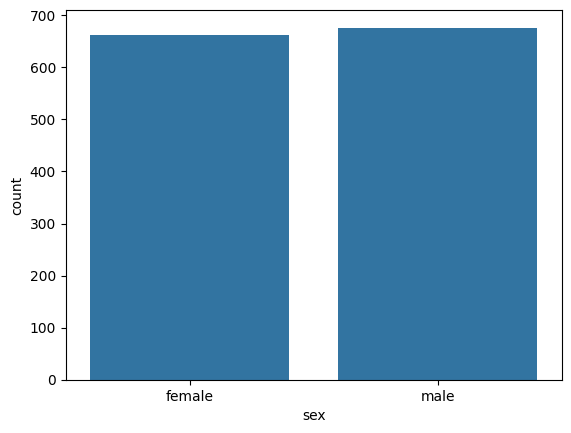

In [105]:
sns.countplot(data=df, x="sex")
plt.show()

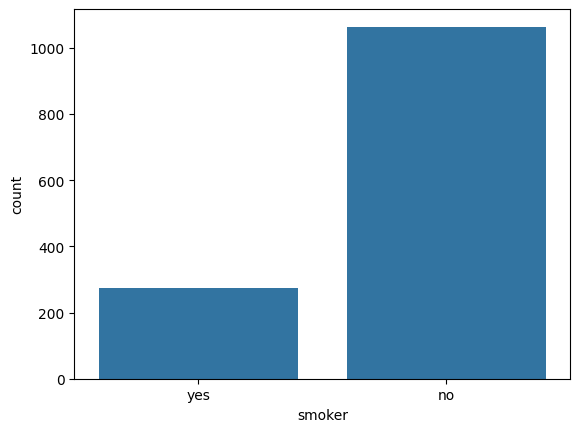

In [106]:
sns.countplot(data=df, x="smoker")
plt.show()

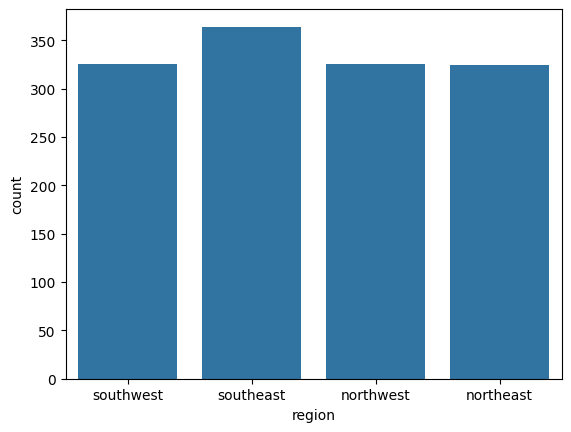

In [107]:
sns.countplot(data=df, x="region")
plt.show()

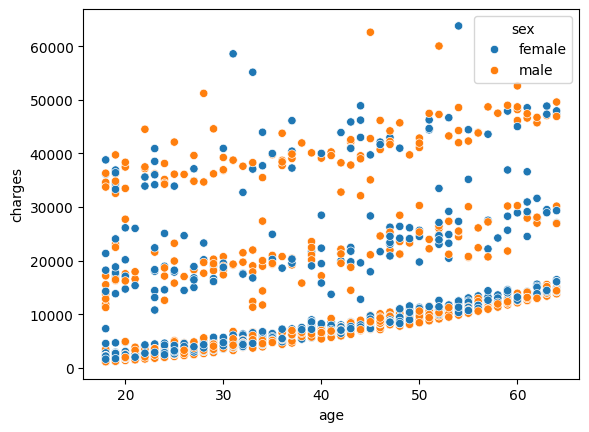

In [108]:
sns.scatterplot(data=df, x="age", y="charges", hue="sex")
plt.show()

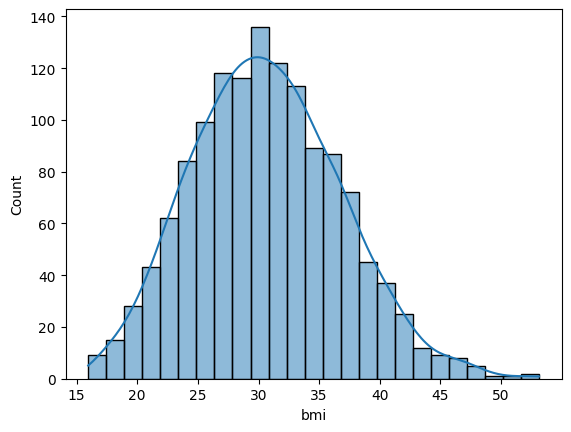

In [109]:
sns.histplot(data=df, x="bmi", kde=True)
plt.show()

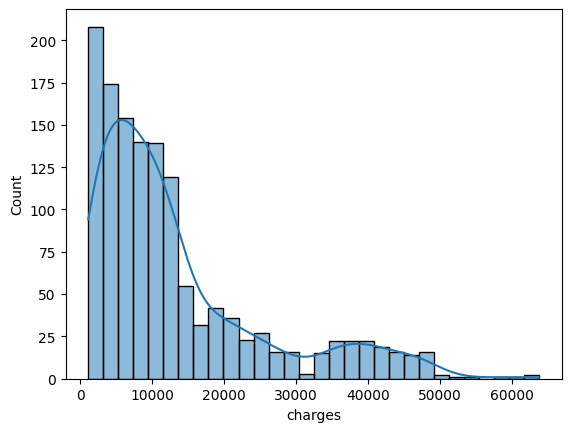

In [110]:
sns.histplot(data=df, x="charges", kde=True)
plt.show()

In [111]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [112]:
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["smoker"] = df["smoker"].map({"no": 0, "yes": 1})

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


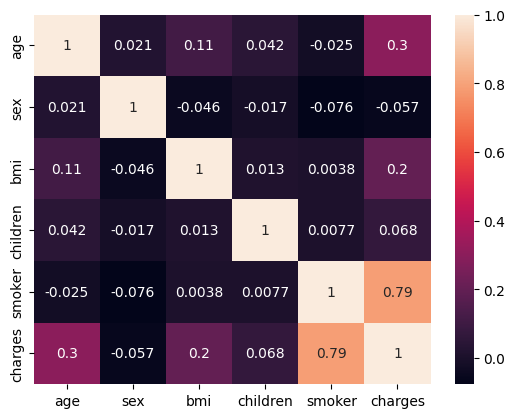

In [147]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [115]:
df.head()

age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520

In [116]:
X = df.drop("charges", axis=1)

y = df["charges"]

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [119]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [120]:
preprocessor = ColumnTransformer(
    transformers=[
        ("one_hot", OneHotEncoder(drop="first", handle_unknown="ignore"), ["region"])
    ],
    remainder="passthrough"
)

In [121]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [122]:
column_names = preprocessor.get_feature_names_out()

In [123]:
X_train = pd.DataFrame(X_train, columns=column_names)
X_test = pd.DataFrame(X_test, columns=column_names)

In [124]:
X_train.head()

one_hot__region_northwest  one_hot__region_southeast  \
0                        0.0                        1.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        1.0   
4                        0.0                        0.0   

   one_hot__region_southwest  remainder__age  remainder__sex  remainder__bmi  \
0                        0.0            56.0             0.0           31.79   
1                        1.0            31.0             1.0           29.10   
2                        0.0            50.0             1.0           27.36   
3                        0.0            48.0             0.0           29.70   
4                        1.0            19.0             1.0           20.60   

   remainder__children  remainder__smoker  
0                  2.0                1.0  
1                  0.0                0.0  
2                  0.0                0.0  
3                  0.0                0.0  
4                  0.0                0.0

In [125]:
from lightgbm import LGBMRegressor

In [126]:
model = LGBMRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [128]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.871843376594573
18458085.613847945
2770.071293021704


In [129]:
#hyperparameter tuning

In [130]:
param_grid = {
    "num_leaves": [31, 50, 70],
    "max_depth": [-1, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 300, 1000],
    "min_child_samples": [10, 20, 30],
    "subsample": [0.6, 0.8, 1.0],
    "comsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.5, 1.0],
    "reg_lambda": [0, 0.5, 1.0],
}

In [131]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
import warnings
warnings.filterwarnings("ignore")

In [133]:
rscv = RandomizedSearchCV(estimator=LGBMRegressor(verbosity=-1), cv=5, param_distributions=param_grid, scoring="neg_root_mean_squared_error", verbose=0, n_jobs=-1, random_state=15)

In [134]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(verbosity=-1), n_jobs=-1,
                   param_distributions={'comsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 5, 10],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 300, 1000],
                                        'num_leaves': [31, 50, 70],
                                        'reg_alpha': [0, 0.5, 1.0],
                                        'reg_lambda': [0, 0.5, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=15, scoring='neg_root_mean_squared_error')

In [135]:
rscv.best_params_

{'subsample': 0.8,
 'reg_lambda': 0,
 'reg_alpha': 0.5,
 'num_leaves': 31,
 'n_estimators': 300,
 'min_child_samples': 20,
 'max_depth': 5,
 'learning_rate': 0.01,
 'comsample_bytree': 0.8}

In [136]:
y_pred = rscv.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9019956703694877
14115324.349058717
2392.9193276712454


In [137]:
#Transformation

In [138]:
from scipy.stats import boxcox

In [139]:
y_train_transformed, lamdba_y = boxcox(y_train)

In [140]:
model = LGBMRegressor()
model.fit(X_train, y_train_transformed)

LGBMRegressor()

In [141]:
y_pred_transformed = model.predict(X_test)

In [142]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0: return np.exp(y)
    return np.power(y * lambda_ + 1, 1 / lambda_)

In [143]:
y_pred = inverse_boxcox(y_pred_transformed, lamdba_y)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.8925898035961266
15470028.378876308
2129.19354753348


In [144]:
#One last hyperparameter tuning w/ transformations this time!

In [ ]:
rscv = RandomizedSearchCV(estimator=LGBMRegressor(verbosity=-1), cv=5, param_distributions=param_grid, scoring="neg_root_mean_squared_error", verbose=0, n_jobs=-1, random_state=15)

rscv.fit(X_train, y_train_transformed)

y_pred_transformed = rscv.predict(X_test)

y_pred = inverse_boxcox(y_pred_transformed, lamdba_y)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9050683401326468
13672775.224055232
1820.1895825576808
